In [205]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import datasets
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
%matplotlib inline

In [206]:
# Loading data 
data = datasets.load_breast_cancer()
#print(data.DESCR)

In [207]:
# Splitting data into validation (0.2), test (0.8*0.2) & train sets (0.8*0.8)
Y = data.target
X = data.data

X_validation, X_t, Y_validation, Y_t = train_test_split(X, Y, test_size=0.80, random_state=42)
X_test, X_train, Y_test, Y_train = train_test_split(X_t, Y_t, test_size=0.80, random_state=42)

In [208]:
# Normalization of the data for features
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

scaler1 = preprocessing.StandardScaler().fit(X_train)
X_train = scaler1.transform(X_train)

scaler2 = preprocessing.StandardScaler().fit(X_validation)
X_validation = scaler2.transform(X_validation)

In [276]:
ac_op = 1.0 # optimal rate of correct classification
ft_op = 0.0 # optimal rate of false true classification

# First metric - Euclidian 

def euclidian_norm(ft,ac):
    return (ft-ft_op)**2+(ac-ac_op)**2 

# Idea
To know how the SVM method behaves through the state space of parameters, we will evaluate three types of kernels in a grid build as param1 X param2:
    1. Gaussian: gamma related with standard deviation & C related with the level of error we can allow.
    2. Linear: 
    3. Polynomial:
    

# Gaussian Kernel
---

In [329]:
N = 30 # num of points per variable 
delta = 0.1
CMAX = 10.0
CMIN = 0.001
GAMMAMAX = 10.0
GAMMAMIN = 0.001

GAMMA = np.linspace(GAMMAMIN,GAMMAMAX,N)
C = np.linspace(CMIN,CMAX,N)

grid_ft = np.zeros((N,N)) # GAMMA vs C
grid_ac = np.zeros((N,N)) # GAMMA vs C

for i in range (0,N):
    for j in range (0,N):
        kernel_svc = svm.SVC(C=C[j], kernel='rbf', gamma=GAMMA[i])
        kernel_svc.fit(X_train,Y_train)
        Y_predict = kernel_svc.predict(X_test)
        MAT = confusion_matrix(Y_test, Y_predict)
        grid_ft[i][j] = MAT[1][0]/sum(sum(MAT))
        grid_ac[i][j] = (MAT[0][0]+MAT[1][1]) / sum(sum(MAT))

In [330]:
gaussian_norm = euclidian_norm(grid_ft,grid_ac)

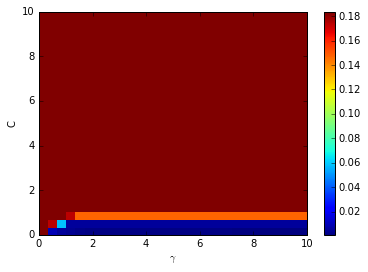

In [331]:
plt.clf()
plt.pcolormesh(GAMMA,C,gaussian_norm)
#plt.imshow(gaussian_norm)
plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.colorbar()

# Lineal Kernel
---

In [333]:
N = 20 # num of points per variable 
delta = 0.1
CMAX = 10.0
CMIN = 0.001
GAMMAMAX = 10.0
GAMMAMIN = 0.001

C = np.linspace(CMIN,CMAX,N)

grid_ft = np.zeros((N)) # GAMMA vs C
grid_ac = np.zeros((N)) # GAMMA vs C

for j in range (0,N):
    linear_svc = svm.SVC(C=C[j], kernel='linear')
    linear_svc.fit(X_train,Y_train)
    Y_predict = kernel_svc.predict(X_test)
    MAT = confusion_matrix(Y_test, Y_predict)
    grid_ft[i] = MAT[1][0]/sum(sum(MAT))
    grid_ac[i] = (MAT[0][0]+MAT[1][1]) / sum(sum(MAT))

IndexError: index 29 is out of bounds for axis 0 with size 20

In [334]:
linear_norm = euclidian_norm(grid_ft,grid_ac)

TypeError: Dimensions of C (30, 30) are incompatible with X (30) and/or Y (20); see help(pcolormesh)

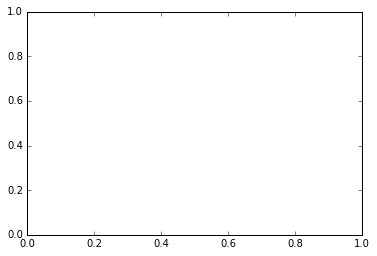

In [335]:
plt.clf()
plt.pcolormesh(GAMMA,C,gaussian_norm)
#plt.imshow(gaussian_norm)
plt.xlabel('$\gamma$')
plt.ylabel('C')
plt.colorbar()